In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, average_precision_score,accuracy_score, f1_score
from utils import acc_f1, flatten,dauc_pr, auc_score, eval_rf

### Plots for the two Metrics

In [48]:
# Simulate some binary classification data
np.random.seed(42)

# define samples
y_pred = np.random.choice([0, 1], size=1000, p=[0.65, 0.35])

y_true = y_pred.copy()
indices_to_change = np.random.choice(1000, size=int(0.35*1000), replace=False)  # Indices to change randomly

# Randomly assign the remaining 35% of y_true
y_true[indices_to_change] = np.random.randint(0, 2, size=int(0.35*1000))

#y_true = np.where(y_pred == 1, np.random.choice([0, 1], size=1000, p=[0.65, 0.35]), y_pred)

# Compute metrics for the current task
acc = accuracy_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 
auc = roc_auc_score(y_true, y_pred) 
aucPR = average_precision_score(y_true, y_pred) 

# for daucPr compute random_clf_auprc
_, counts = np.unique(y_true, return_counts=True)
n_inactives = counts[0]
n_actives = counts[1]
n_total = n_actives + n_inactives
random_clf_auprc = n_actives / n_total
# dAUC PR
daucPR = aucPR - random_clf_auprc
roc = roc_curve(y_true, y_pred) 

# comp pre,rec
precision, recall, _ = precision_recall_curve(y_true, y_pred)
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred)

# Create a DataFrame to store metrics for each task
metrics_dict = {
    'Accuracy': np.mean(acc),
    'F1 Score': np.mean(f1),
    'AUC': np.mean(auc),
    'D-AUC PR': np.mean(daucPR)
    }
    
# Convert the dictionary to a pandas DataFrame
evals_df = pd.DataFrame([metrics_dict])

evals_df

(array([0.        , 0.09477124, 1.        ]), array([0.        , 0.69845361, 1.        ]), array([inf,  1.,  0.]))


,Accuracy,F1 Score,AUC,D-AUC PR
0,0.825,0.755927,0.801841,0.304322


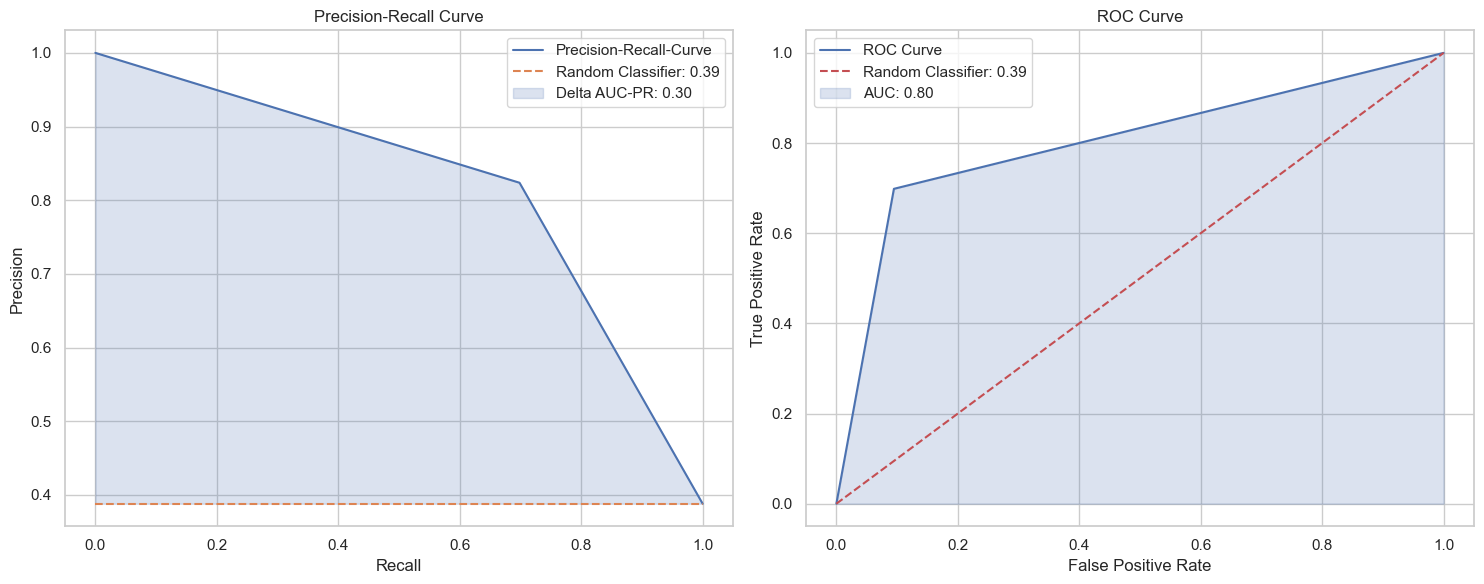

In [55]:
# Plotting both Precision-Recall Curve and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Precision-Recall Curve
ax1.plot(recall, precision, label=f'Precision-Recall-Curve')
ax1.plot([0, 1], [random_clf_auprc, random_clf_auprc], linestyle='--', label=f'Random Classifier: {random_clf_auprc:.2f}')
ax1.fill_between(recall, precision, random_clf_auprc, alpha=0.2, color='b', label=f'Delta AUC-PR: {delta_auc_pr:.2f}')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve')
ax1.legend()
ax1.grid(True)

# ROC Curve
ax2.plot(fpr, tpr, label='ROC Curve')
ax2.plot([0, 1], [0, 1], linestyle='--', color='r', label=f'Random Classifier: {random_clf_auprc:.2f}')
ax2.fill_between(fpr, tpr, 0, alpha=0.2, color='b', label=f'AUC: {auc:.2f}')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
sns.set()
plt.show()

### Plots for the Sigmoid function about the outcome of it either being active or inactive

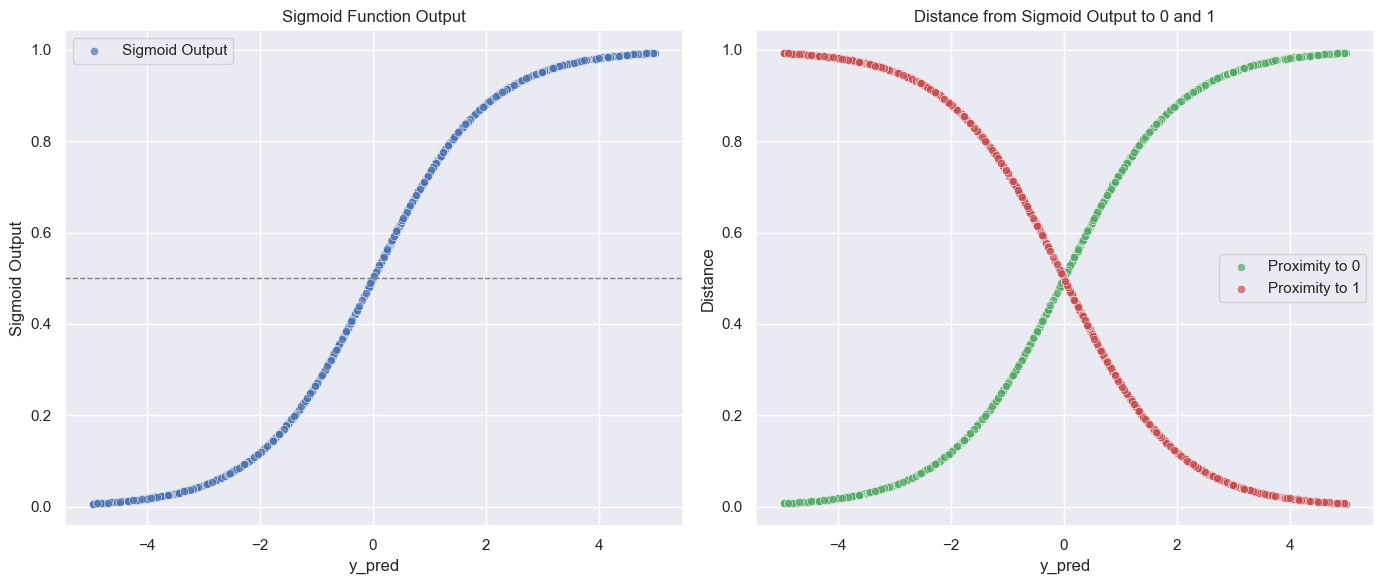

In [59]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Predefined y_pred array (example)
np.random.seed(42)
y_pred = np.random.rand(1000) * 10 - 5  # Example: Replace with your predefined y_pred

# Calculate sigmoid outputs
y_sigmoid = sigmoid(y_pred)
# Calculate proximity to 0 and 1
y_proximity_to_0 = np.abs(y_sigmoid - 0)
y_proximity_to_1 = np.abs(y_sigmoid - 1)

# Plotting using Seaborn for styling
plt.figure(figsize=(14, 6))

# Plot sigmoid function output
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=y_sigmoid, color='b', alpha=0.7, label='Sigmoid Output')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.xlabel('y_pred')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Function Output')
plt.legend()

# Plot proximity to 0 and 1
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=y_proximity_to_0, color='g', alpha=0.7, label='Proximity to 0')
sns.scatterplot(x=y_pred, y=y_proximity_to_1, color='r', alpha=0.7, label='Proximity to 1')
plt.xlabel('y_pred')
plt.ylabel('Distance')
plt.title('Distance from Sigmoid Output to 0 and 1')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()